<a href="https://colab.research.google.com/github/Kashi-2002/Book_By_Brain/blob/main/seed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***The data we used was in the form of an array containing the microvolts value which signified the intensity of the brain signals.Here in our project we used preprocessed data that was free from noise and artifacts and also had a paticular bandwith.The project shows how well can neural networks help in predicting the emotion of a person.***

In [ ]:
import numpy as np
import pickle
import pandas as pd

In [1]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [2]:
!pwd

/content


In [3]:
!git clone https://github.com/Kashi-2002/Book_By_Brain.git

Cloning into 'Book_By_Brain'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
tran=pd.read_csv("/content/drive/MyDrive/seed_2.csv") ##reading the csv file containing all the feature values corresponding to data. 

In [ ]:
tran

,Unnamed: 0,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,label
0,0,10.356102,8.453970,9.182864,6.004890,5.141894,10.290716,8.406716,9.207439,5.734522,4.649539,10.296361,8.436039,9.227639,5.963793,5.004069,9.242926,7.541534,8.937119,5.326251,4.190806,9.106108,7.474579,9.029394,5.320660,4.096002,9.287187,7.631848,8.733841,6.562271,6.228434,8.821384,7.260277,8.688749,6.425206,6.269118,8.477730,7.080601,8.608838,5.706875,...,7.165267,8.451809,4.880166,2.577921,9.335544,7.333106,8.634286,5.129653,3.190694,9.524552,7.533214,8.680339,5.344713,3.530509,9.637438,7.742234,8.929089,5.902891,4.322857,9.318787,7.376810,8.598685,5.347507,3.639575,9.241322,7.494618,8.466540,5.160859,3.200828,9.172295,7.283657,8.523224,5.003387,2.879170,9.615048,7.721449,8.756285,5.505700,3.557300,4.0
1,1,10.354815,8.453036,9.182566,6.004623,5.141820,10.289452,8.405880,9.207191,5.734266,4.649478,10.294926,8.435161,9.227511,5.963618,5.004190,9.241766,7.540608,8.936876,5.325844,4.190795,9.104858,7.474047,9.029259,5.320358,4.095976,9.286710,7.631130,8.733473,6.562546,6.228927,8.820897,7.259444,8.688423,6.425323,6.269763,8.477579,7.079906,8.608640,5.706816,...,7.165090,8.451938,4.880640,2.578247,9.335866,7.333095,8.634399,5.129909,3.190849,9.524632,7.533344,8.680377,5.344883,3.530454,9.637514,7.742058,8.928947,5.902723,4.323009,9.318853,7.376486,8.598602,5.347469,3.639767,9.241382,7.494455,8.466420,5.161006,3.201065,9.172635,7.283529,8.523248,5.003657,2.879481,9.615013,7.721393,8.756245,5.505755,3.557400,4.0
2,2,10.352640,8.451730,9.182253,6.004298,5.141673,10.287379,8.404652,9.206818,5.733827,4.649188,10.292508,8.433839,9.227310,5.963354,5.004233,9.240024,7.539283,8.936574,5.325271,4.190687,9.102940,7.473249,9.028961,5.319865,4.095849,9.286414,7.630418,8.733284,6.563289,6.230129,8.820535,7.258581,8.688217,6.425900,6.271118,8.477828,7.079202,8.608504,5.706962,...,7.164780,8.451937,4.881357,2.578759,9.335990,7.332966,8.634373,5.130253,3.191039,9.524383,7.533540,8.680337,5.345064,3.530282,9.637488,7.741831,8.928905,5.902529,4.323225,9.318699,7.375860,8.598497,5.347495,3.640116,9.241232,7.494010,8.466350,5.161238,3.201336,9.172764,7.283271,8.523222,5.004054,2.879892,9.614570,7.721243,8.756308,5.505813,3.557577,4.0
3,3,10.350465,8.450617,9.181642,6.004049,5.141211,10.285401,8.403554,9.206070,5.733409,4.648416,10.290289,8.432719,9.226759,5.963101,5.003893,9.238675,7.538073,8.936013,5.324883,4.190333,9.101366,7.472598,9.028320,5.319494,4.095448,9.286381,7.629810,8.733168,6.564539,6.232020,8.820578,7.257797,8.687955,6.427125,6.273094,8.478468,7.078598,8.608224,5.707616,...,7.164421,8.451616,4.881841,2.579301,9.335759,7.332525,8.633956,5.130301,3.191058,9.523882,7.533538,8.680022,5.345074,3.529896,9.637298,7.741597,8.929045,5.902303,4.323497,9.318297,7.375074,8.598264,5.347559,3.640655,9.240855,7.493421,8.466268,5.161461,3.201605,9.172640,7.282900,8.523018,5.004297,2.880240,9.613893,7.721066,8.756528,5.505806,3.557766,4.0
4,4,10.347972,8.448817,9.180328,6.003959,5.140420,10.283218,8.401791,9.204567,5.733128,4.647245,10.287948,8.431105,9.225500,5.962962,5.003267,9.237587,7.536320,8.934786,5.324680,4.189806,9.099964,7.471649,9.026984,5.319310,4.094816,9.286547,7.629023,8.732732,6.566218,6.234654,8.820958,7.256745,8.6873

In [ ]:
Y=pd.DataFrame({'label':tran['label']},index=None)

In [ ]:
Y

,label
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
29163,0.0
29164,0.0
29165,0.0
29166,0.0


In [ ]:
tran=tran.drop(['Unnamed: 0','label'],axis=1)

In [ ]:
tran

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309
0,10.356102,8.453970,9.182864,6.004890,5.141894,10.290716,8.406716,9.207439,5.734522,4.649539,10.296361,8.436039,9.227639,5.963793,5.004069,9.242926,7.541534,8.937119,5.326251,4.190806,9.106108,7.474579,9.029394,5.320660,4.096002,9.287187,7.631848,8.733841,6.562271,6.228434,8.821384,7.260277,8.688749,6.425206,6.269118,8.477730,7.080601,8.608838,5.706875,4.936503,...,9.050973,7.165267,8.451809,4.880166,2.577921,9.335544,7.333106,8.634286,5.129653,3.190694,9.524552,7.533214,8.680339,5.344713,3.530509,9.637438,7.742234,8.929089,5.902891,4.322857,9.318787,7.376810,8.598685,5.347507,3.639575,9.241322,7.494618,8.466540,5.160859,3.200828,9.172295,7.283657,8.523224,5.003387,2.879170,9.615048,7.721449,8.756285,5.505700,3.557300
1,10.354815,8.453036,9.182566,6.004623,5.141820,10.289452,8.405880,9.207191,5.734266,4.649478,10.294926,8.435161,9.227511,5.963618,5.004190,9.241766,7.540608,8.936876,5.325844,4.190795,9.104858,7.474047,9.029259,5.320358,4.095976,9.286710,7.631130,8.733473,6.562546,6.228927,8.820897,7.259444,8.688423,6.425323,6.269763,8.477579,7.079906,8.608640,5.706816,4.937108,...,9.051329,7.165090,8.451938,4.880640,2.578247,9.335866,7.333095,8.634399,5.129909,3.190849,9.524632,7.533344,8.680377,5.344883,3.530454,9.637514,7.742058,8.928947,5.902723,4.323009,9.318853,7.376486,8.598602,5.347469,3.639767,9.241382,7.494455,8.466420,5.161006,3.201065,9.172635,7.283529,8.523248,5.003657,2.879481,9.615013,7.721393,8.756245,5.505755,3.557400
2,10.352640,8.451730,9.182253,6.004298,5.141673,10.287379,8.404652,9.206818,5.733827,4.649188,10.292508,8.433839,9.227310,5.963354,5.004233,9.240024,7.539283,8.936574,5.325271,4.190687,9.102940,7.473249,9.028961,5.319865,4.095849,9.286414,7.630418,8.733284,6.563289,6.230129,8.820535,7.258581,8.688217,6.425900,6.271118,8.477828,7.079202,8.608504,5.706962,4.938359,...,9.051282,7.164780,8.451937,4.881357,2.578759,9.335990,7.332966,8.634373,5.130253,3.191039,9.524383,7.533540,8.680337,5.345064,3.530282,9.637488,7.741831,8.928905,5.902529,4.323225,9.318699,7.375860,8.598497,5.347495,3.640116,9.241232,7.494010,8.466350,5.161238,3.201336,9.172764,7.283271,8.523222,5.004054,2.879892,9.614570,7.721243,8.756308,5.505813,3.557577
3,10.350465,8.450617,9.181642,6.004049,5.141211,10.285401,8.403554,9.206070,5.733409,4.648416,10.290289,8.432719,9.226759,5.963101,5.003893,9.238675,7.538073,8.936013,5.324883,4.190333,9.101366,7.472598,9.028320,5.319494,4.095448,9.286381,7.629810,8.733168,6.564539,6.232020,8.820578,7.257797,8.687955,6.427125,6.273094,8.478468,7.078598,8.608224,5.707616,4.940157,...,9.050754,7.164421,8.451616,4.881841,2.579301,9.335759,7.332525,8.633956,5.130301,3.191058,9.523882,7.533538,8.680022,5.345074,3.529896,9.637298,7.741597,8.929045,5.902303,4.323497,9.318297,7.375074,8.598264,5.347559,3.640655,9.240855,7.493421,8.466268,5.161461,3.201605,9.172640,7.282900,8.523018,5.004297,2.880240,9.613893,7.721066,8.756528,5.505806,3.557766
4,10.347972,8.448817,9.180328,6.003959,5.140420,10.283218,8.401791,9.204567,5.733128,4.647245,10.287948,8.431105,9.225500,5.962962,5.003267,9.237587,7.536320,8.934786,5.324680,4.189806,9.099964,7.471649,9.026984,5.319310,4.094816,9.286547,7.629023,8

In [ ]:
tran['combine'] = tran.values.tolist()

In [ ]:
for i in range(tran['combine'].shape[0]):
    tran['combine'][i]=np.asarray(tran['combine'][i]) ##merge the data to form an array 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tran['combine'][0].shape

(310,)

In [ ]:
data = []
label = []
for i in range(0,tran.shape[0]):
    data.append(tran['combine'][i])
    label.append(Y['label'][i])

In [ ]:
data[779]

array([11.08316931,  9.11230307,  8.87036751,  6.12812323,  5.22943809,
       10.95029702,  8.95368551,  8.8573216 ,  5.60985178,  4.50550432,
       11.16020922,  8.97388329,  8.87081601,  6.11409857,  5.24842547,
       10.21123885,  8.19065702,  8.49868502,  5.37194168,  4.05861066,
        9.94103546,  7.9434142 ,  8.65152316,  5.17852742,  3.9053823 ,
       10.14438824,  8.09226758,  8.09093444,  6.12236536,  5.15566169,
        9.72244869,  7.7813044 ,  7.98252353,  5.41153487,  4.02859096,
        9.27424249,  7.37097092,  7.98493191,  5.02006973,  3.37498946,
        8.60889218,  6.91594338,  8.23824099,  4.55005032,  2.51622033,
        8.43486771,  6.7435913 ,  8.51358217,  4.3797087 ,  2.19792869,
        8.58798891,  6.83115063,  8.55518092,  4.45086166,  2.32584038,
        9.00648965,  7.19315967,  8.39064413,  4.89407251,  3.17720731,
        9.36460949,  7.48843252,  8.17832309,  5.14314385,  3.66246108,
        9.72129731,  7.82877793,  8.15359756,  5.4618162 ,  4.49

In [ ]:
new_train=np.asarray(data) 

In [ ]:
new_train=new_train.reshape(new_train.shape[0],new_train.shape[1],1) ##reshaping the data to 3D

In [ ]:
new_train.shape

(29168, 310, 1)

In [ ]:
label_new=np.asarray(label)

In [ ]:
label_new.shape

(29168,)

In [ ]:
label_new

array([4., 4., 4., ..., 0., 0., 0.])

In [ ]:
from sklearn.utils import shuffle
new_train,label_new=shuffle(new_train,label_new,random_state=123) ##shuffle the array to reduce overfitting.

In [ ]:
label_new

array([3., 0., 2., ..., 2., 1., 1.])

In [ ]:
unique, counts = np.unique(label_new, return_counts=True)
label_dist = dict(zip(unique, counts))
print(label_dist)

{0.0: 4896, 1.0: 5968, 2.0: 7616, 3.0: 5872, 4.0: 4816}


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.utils import to_categorical 
label_new = to_categorical(label_new)

In [ ]:
label_new

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_train, label_new, test_size=0.1, random_state=42)

**MODEL 1D CNN**

In [ ]:
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
batch_size = 256
num_classes = 5
epochs = 100
input_shape=(new_train.shape[1], 1)

In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense,Conv1D
from keras.regularizers import l2

In [ ]:
model = Sequential()
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
#model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
#model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 310, 128)          512       
                                                                 
 batch_normalization (BatchN  (None, 310, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 155, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 155, 128)          49280     
                                                                 
 batch_normalization_1 (Batc  (None, 155, 128)         512       
 hNormalization)                                                 
                                                        

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]

In [ ]:
H = model.fit(x_train,y_train ,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/100
103/103 [==============================] - 57s 551ms/step - loss: 1.4471 - accuracy: 0.3345 - val_loss: 1.4846 - val_accuracy: 0.3356
Epoch 2/100
103/103 [==============================] - 57s 550ms/step - loss: 1.4279 - accuracy: 0.3340 - val_loss: 1.3711 - val_accuracy: 0.3774
Epoch 3/100
103/103 [==============================] - 57s 551ms/step - loss: 1.3738 - accuracy: 0.3543 - val_loss: 1.5880 - val_accuracy: 0.3198
Epoch 4/100
103/103 [==============================] - 56s 547ms/step - loss: 1.3677 - accuracy: 0.3566 - val_loss: 1.4171 - val_accuracy: 0.3723
Epoch 5/100
103/103 [==============================] - 56s 547ms/step - loss: 1.3246 - accuracy: 0.3852 - val_loss: 1.5627 - val_accuracy: 0.3370
Epoch 6/100
103/103 [==============================] - 56s 546ms/step - loss: 1.2820 - accuracy: 0.4039 - val_loss: 1.4336 - val_accuracy: 0.3497
Epoch 7/100
103/103 [==============================] - 56s 546ms/step - loss: 1.2668 - accuracy: 0.4190 - val_loss: 1.2646 -

In [ ]:
metrics_df = pd.DataFrame(H.history)

In [ ]:
metrics_df

,loss,accuracy,val_loss,val_accuracy
0,1.447103,0.334540,1.484645,0.335619
1,1.427880,0.334044,1.371059,0.377443
2,1.373844,0.354310,1.587967,0.319849
3,1.367747,0.356558,1.417106,0.372300
4,1.324617,0.385242,1.562749,0.336990
...,...,...,...,...
95,0.150615,0.950326,0.083694,0.967775
96,0.153346,0.949411,0.046512,0.982173
97,0.148292,0.951926,0.088316,0.975660
98,0.139520,0.952573,0.027288,0.994172


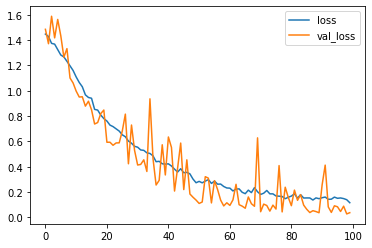

In [ ]:
metrics_df[["loss","val_loss"]].plot();

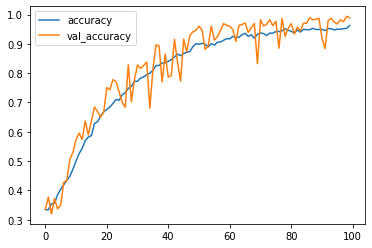

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot();

**LSTM MODEL**

In [ ]:
  from keras.regularizers import l2
  from keras.layers import Bidirectional
  from keras.layers import LSTM


In [ ]:
  mom = Sequential()
 
  mom.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
  mom.add(Dropout(0.6))

  mom.add(LSTM(units = 256, return_sequences = True))  
  mom.add(Dropout(0.6))

  mom.add(LSTM(units = 64, return_sequences = True))  
  mom.add(Dropout(0.6))

  mom.add(LSTM(units = 64, return_sequences = True))  
  mom.add(Dropout(0.4))

  mom.add(LSTM(units = 32))
  mom.add(Dropout(0.4))

  mom.add(Dense(units = 16))
  mom.add(Activation('relu'))

  mom.add(Dense(units = num_classes))
  mom.add(Activation('softmax'))

In [ ]:
mom.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 310, 256)         133120    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 310, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 310, 256)          525312    
                                                                 
 dropout_1 (Dropout)         (None, 310, 256)          0         
                                                                 
 lstm_2 (LSTM)               (None, 310, 64)           82176     
                                                                 
 dropout_2 (Dropout)         (None, 310, 64)           0         
                                                        

In [ ]:
import tensorflow as tf

In [ ]:
  mom.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])
  m=mom.fit(x_train, y_train,epochs=100,batch_size=256,verbose=1,validation_data=(x_test, y_test)) ## took too long to train and even after 
                                                                                                   ## epochs score not quite satisfactory.

Epoch 1/100
103/103 [==============================] - 1303s 13s/step - loss: 1.6013 - accuracy: 0.2523 - val_loss: 1.5910 - val_accuracy: 0.2777
Epoch 2/100
103/103 [==============================] - 1268s 12s/step - loss: 1.5982 - accuracy: 0.2576 - val_loss: 1.5910 - val_accuracy: 0.2777
Epoch 3/100
103/103 [==============================] - 1271s 12s/step - loss: 1.5965 - accuracy: 0.2587 - val_loss: 1.5910 - val_accuracy: 0.2777
Epoch 4/100
103/103 [==============================] - 1269s 12s/step - loss: 1.5962 - accuracy: 0.2592 - val_loss: 1.5937 - val_accuracy: 0.2777
Epoch 5/100
 91/103 [=========================>....] - ETA: 2:22 - loss: 1.5964 - accuracy: 0.2606

KeyboardInterrupt: ignored